In [1]:
#Se importan librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
#Se crean los datos
np.random.seed(0)
X = np.r_[np.random.randn(70,2)-[2,2], np.random.randn(70,2)+[2,2]]
Y = [0]*70+[1]*70

In [3]:
#Se estima el modelo
clf = svm.SVC(kernel = 'linear', C = 1)
clf.fit(X,Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
clf.coef_

array([[1.23689809, 0.66283995]])

In [5]:
clf.support_vectors_

array([[-0.07705797, -0.51948521],
       [ 1.3563816 , -0.22340315],
       [ 0.06372019,  2.1887786 ]])

In [6]:
#Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-5,5)
yy = a*xx - (clf.intercept_[0])/w[1]

In [7]:
#Vectores de soporte
b = clf.support_vectors_[0]
yy_down = a*xx + (b[1]-a*b[0])
b = clf.support_vectors_[-1]
yy_up = a*xx + (b[1]-a*b[0])

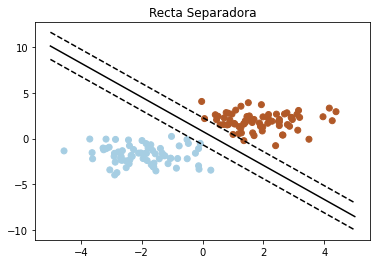

In [8]:
#Gráfica

plt.plot(xx,yy,'k-')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,facecolors='none')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)
plt.title('Recta Separadora')
plt.axis('tight')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


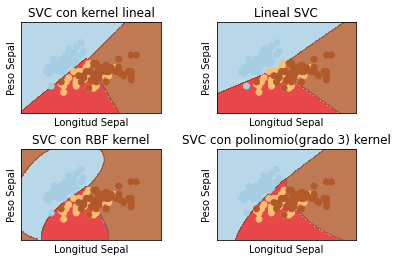

In [14]:
#Se importan los datos
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

h = .02

#Parámetro de regularización
C = 1.0 

svc = svm.SVC(kernel='linear',C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly',degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

#Probé pero no me gustó el resultado con sigmoid
#sigmoid_svc=svm.SVC(kernel='sigmoid').fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#Títulos para las gráficas
titles = ['SVC con kernel lineal',
 'Lineal SVC',
 'SVC con RBF kernel',
 'SVC con polinomio(grado 3) kernel']


for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):
    #Se grafican las fronteras 
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Color en las gráficas
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #Puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Longitud Sepal')
    plt.ylabel('Peso Sepal')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [10]:
clf.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [6.7, 3.1],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.8, 2.7],
       [6. , 2.7],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [6.1, 3. ],
       [5.8, 2.6],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [6.3, 2.9],
       [6.5, 3. ],
       [4.9, 2.5],
       [6.7, 2.5],
       [6.5, 3.2],
       [6.4, 2.7],
       [6.8, 3. ],
       [5.7, 2.5],
       [5.8, 2.8],
       [6.4, 3.2],
       [6.5, 3. ],
       [6. , 2.2],
       [5.6, 2.8],
       [6.3, 2.7],
       [6.7,

In [11]:
clf.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [6.7, 3.1],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.8, 2.7],
       [6. , 2.7],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [6.1, 3. ],
       [5.8, 2.6],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [6.3, 2.9],
       [6.5, 3. ],
       [4.9, 2.5],
       [6.7, 2.5],
       [6.5, 3.2],
       [6.4, 2.7],
       [6.8, 3. ],
       [5.7, 2.5],
       [5.8, 2.8],
       [6.4, 3.2],
       [6.5, 3. ],
       [6. , 2.2],
       [5.6, 2.8],
       [6.3, 2.7],
       [6.7,